## Intro to python fundamentals


In [ ]:
# Four key types
a = 1 # int (Integers, whole numbers)
type(a) # recall in R: typeof()


int

In [ ]:
b = 0.25 # float ("double", numeric, real numbers)
type(b)


float

In [ ]:
c = 'Berlin' # str (string, "character", object)
type(c)


str

In [ ]:
d = True # bool (Boolean, binary, "logical", True/False)
type(d)

bool

**Exercise 3.1**

What will these commands produce

In [ ]:
1 + 1

2

In [ ]:
'1' + '1'

'11'

In the above command we "added" two strings together "concatenate". In R, we would use `paste()`

In [ ]:
'1' * 5

'11111'

prediction: error because you're "adding" a `str` with `int`. Or... 11111, or `15`.

In [ ]:
'1' '1'

'11'

## Exploring Functions & Methods

First initialize some packages

In [ ]:
import math # literally from math import *
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Call some basic functions

In [ ]:
numb = 8
np.log2(numb)

3.0

In [ ]:
math.log2(8)

3.0

### Lists (Data containers I)

This give an error :/ `can only concatenate list (not "int") to list`



In [ ]:
# [1, 6, 9, 36] + 100

Below, we may predict `11,106,19,136` if we expect vector recycling (as in R,), but what we really get is ... `1,6,9,36,10,100`

In [ ]:
[1, 6, 9, 36] + [10, 100]


[1, 6, 9, 36, 10, 100]

Below we'll get the same thing

In [ ]:
[1, 6, 9, 36] + [100, 200, 300, 400]



[1, 6, 9, 36, 100, 200, 300, 400]

In [ ]:
[1, 6, 9, 36] + [100, "dogs", 300, 400]



[1, 6, 9, 36, 100, 'dogs', 300, 400]

This shows us that lists can be _heterogeneous_

In [ ]:
heights = [167, 188, 178, 194, 171, 169]
heights

[167, 188, 178, 194, 171, 169]

In [ ]:
type(heights)

list

In [ ]:
np.mean(heights) # the mean

177.83333333333334

In [ ]:
np.std(heights) # the standard deviation

10.05678322769706

In [ ]:
sum(heights)

1067

In [ ]:
len(heights) # The number of elements, would use length()

6

 **Exercise 3.3**

 Calculate the lower and upper limits of the 95% confidence interval for the list of heights.

In [ ]:
# Lower limit: mean - 1.96 * sd/sqrt of n
heights_mean = np.mean(heights)
height_sd = np.std(heights)
height_sq_n = math.sqrt(len(heights))

heights_mean - 1.96 * height_sd/height_sq_n 

169.78623079519832

In [ ]:
# Upper limit: mean + 1.96 * sd/sqrt of n

heights_mean + 1.96 * height_sd/height_sq_n 


185.88043587146836

**Exercise 3.4**

Using the data below:

In [ ]:
cities = ['Munich', 'Paris', 'Amsterdam', 'Madrid', 'Istanbul']
dist = [584, 1054, 653, 2301, 2191]

- How many observations are there?

In [ ]:
len(dist)

5

- What is the longest and shortest distance?

In [ ]:
# longest
max(dist)

2301

In [ ]:
# shortest
min(dist)

584

- Get the average distance

In [ ]:
np.mean(dist)
# sum(dist)/len(dist) 

1356.6

**Exercise 3.5** 

Visualize the values in the `dist` list as a _univariate strip plot_ or a _histogram_.

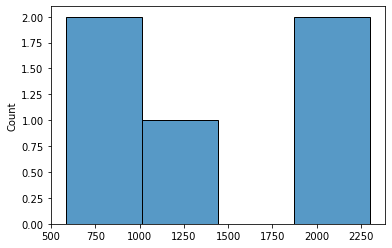

In [ ]:
# First import seaborn to get nice plotting functions
# use the alias sns
import seaborn as sns
sns.histplot(dist)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


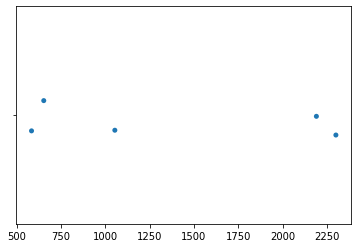

In [ ]:
sns.stripplot(dist)

### Making functions

Use the `def` keyword to _define_ a new function `addNumbs` whidh will take two arguments `x` and `y` and uses the `return` keyword to give back the result. Add a comment using `"""` notation.

In [ ]:
def addNumbs(x, y):
    """Add two numbers together"""
    z = x + y
    return z

In [ ]:
addNumbs(5, 6)

11

**Exercise 3.6** 
Create a function, `confInt` that** takes a list **and returns the lower 95%CI limit

In [ ]:
def confInt(x):
    """Calculate the 95%CI"""
    m = np.mean(x)
    std = np.std(x)
    n = len(x)
    CiH = m + 1.96 * std / math.sqrt(n)
    CiL = m - 1.96 * std / math.sqrt(n)
    return CiL

In [ ]:
confInt(heights)

169.78623079519832

Outputting more than one value as a **tuple**

In [ ]:
def mathFun(x, y):
    """Add and subtract two numbers together"""
    return x + y, x - y

In [ ]:
my_out = mathFun(4, 6)
type(my_out)

tuple

**Exercise 3.7** 
Create a tuple output from `confInt` that returns the lower & upper 95%CI limit

In [ ]:
def confInt(x):
    """Calculate the 95%CI"""
    m = np.mean(x)
    std = np.std(x)
    n = len(x)
    CiH = m + 1.96 * std / math.sqrt(n)
    CiL = m - 1.96 * std / math.sqrt(n)
    return CiL, CiH

In [ ]:
confInt(heights)

(169.78623079519832, 185.88043587146836)

**lamba** functions: Making _anonymous_ functions.

A simple syntax for making short and simple functions:

In [ ]:
raise_to_power =  lambda x, y: x ** y
raise_to_power(2, 3)

8

More typically, a way to make unnamed _anonymous_ functions:

In [ ]:
nums = [3, 5, 6, 8, 3]
nums # a list of 5 elements

[3, 5, 6, 8, 3]

In [ ]:
# nums ** 2 # this gives a typeError :/ :/ we would actually expect vector recycling

In [ ]:
square_all = map(lambda num: num ** 2, nums) # this applies a lamba functions to each element and outputs a map objects

In [ ]:
list(square_all) # this converts to a list object

[9, 25, 36, 64, 9]

### Methods

Methods are special functions that belong to specific objects.


In [ ]:
l = [1, "2", True]
l

[1, '2', True]

In [ ]:
# l can be directly modified
l.append("append value")

# Not:
# l = append(l, "appended value")
# This would be similar to c(l, "value") in R

In [ ]:
l

[1, '2', True, 'append value']

In [ ]:
# lower() converts but does not update this scalar
name = "Berlin"
name.lower()

'berlin'

In [ ]:
name.upper()

'BERLIN'

In [ ]:
cities

['Munich', 'Paris', 'Amsterdam', 'Madrid', 'Istanbul']

In [ ]:
# lower() is not a method for a list object
# cities.lower()

Methods for numerical list objects


In [ ]:
# Available methods for this object:
dir(dist)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

Examples:

- `.append()`
 

In [ ]:
# Append a new value to the end of the list:
dist.append(500)

In [ ]:
dist

[584, 1054, 653, 2301, 2191, 500]

- `.clear`
 

In [ ]:
# Remove all items
dist.clear()

In [ ]:
dist

[]

In [ ]:
# Re-establish dist
dist = [584, 1054, 653, 2301, 2191, 500]
dist

[584, 1054, 653, 2301, 2191, 500]

 - `copy`
 

In [ ]:
# Makes a shallow copy (we'll see this later on)
# dist.copy()

- `count`
 

In [ ]:
dist.count(653)

1

- `extend`
 

In [ ]:
# Need an iterable object here:
# dist.extend()

- `index`
 

In [ ]:
# First index position of a value
dist.index(1054) #1, since python indexes from 0

1

- `insert`
 

In [ ]:
dist.insert(1, 999)
dist

[584, 999, 1054, 653, 2301, 2191, 500]

- `pop`
 

In [ ]:
dist.pop(4)

2301

In [ ]:
dist

[584, 999, 1054, 653, 2191, 500]

- `remove`
 

In [ ]:
dist.remove(999)

In [ ]:
dist

[584, 1054, 653, 2191, 500]

- `reverse`
 

In [ ]:
dist.reverse()
dist

[500, 2191, 653, 1054, 584]

- `sort`

In [ ]:
dist.sort()
dist

[500, 584, 653, 1054, 2191]

#### A short aside on Coercion

In [ ]:
type(numb)

int

In [ ]:
str(numb)

'8'

In [ ]:
# Still an integer
numb

8

In [ ]:
letter = '8'
type(letter)


str

In [ ]:
int(letter)

8

### Attribues

The `__` notation is pronounced _dunder_ (double underscore)

In [ ]:

l.__len__

<method-wrapper '__len__' of list object at 0x7f7b61fb8c48>

In [ ]:
# This accesses the attribute directly
len(l)

4

Recall our function from earlier, with `"""`

In [ ]:
addNumbs.__doc__

'Add two numbers together'

### Dictionaries

- `[]` produce lists
- `()` produce tuples (immutable)
- `{}` produce dictionaries `key:value`
- `dict(zip([],[]))` zip two lists to make a dictionary

In [ ]:
d = {'int_value':3, 
     'bool_value':False, 
     'str_value':'hello'}

d

{'bool_value': False, 'int_value': 3, 'str_value': 'hello'}

In [ ]:
# basic indexing using a key
d['str_value'] #return the value at this key position

'hello'

Adding more `values` using lists.

In [ ]:
organizations = {'name': ['Volkswagen', 'Daimler', 'Allianz', 'Charite'],
                 'structure': ['company', 'company', 'company', 'research']}

organizations

{'name': ['Volkswagen', 'Daimler', 'Allianz', 'Charite'],
 'structure': ['company', 'company', 'company', 'research']}

In [ ]:
organizations['name']

['Volkswagen', 'Daimler', 'Allianz', 'Charite']

Create a dictionary from two lists using zip()

In [ ]:
heights = [167, 188, 178, 194, 171, 169]
persons = ["Mary", "John", "Kevin", "Elena", "Doug", "Galin"]

heights_persons = dict(zip(persons, heights))
heights_persons

{'Doug': 171,
 'Elena': 194,
 'Galin': 169,
 'John': 188,
 'Kevin': 178,
 'Mary': 167}

In [ ]:
# what if we remove one:
heights = [167, 188, 178, 194, 171, 169]
persons = ["Mary", "Kevin", "Elena", "Doug", "Galin"]

In [ ]:
heights_persons_2 = dict(zip(persons, heights))
heights_persons_2
# last value is unmatched and exempted

{'Doug': 194, 'Elena': 178, 'Galin': 171, 'Kevin': 188, 'Mary': 167}

In [ ]:
heights_persons.keys()

dict_keys(['Mary', 'John', 'Kevin', 'Elena', 'Doug', 'Galin'])

In [ ]:
heights_persons.values()

dict_values([167, 188, 178, 194, 171, 169])

**Exercise 3.16**

In [ ]:
cities = ['Munich', 'Paris', 'Amsterdam', 'Madrid', 'Istanbul']
dist = [584, 1054, 653, 2301, 2191]

distDict = dict(zip(cities, dist))
distDict

{'Amsterdam': 653,
 'Istanbul': 2191,
 'Madrid': 2301,
 'Munich': 584,
 'Paris': 1054}

## NumPy (Data Containers III)

- np.array([]) produces an ndarray

**bold text**`ndarray` where nd = n-dimensional array.

In [ ]:
# already imported nympy as np
# Basic list
xx = [3, 8, 9, 23]
xx


[3, 8, 9, 23]

In [ ]:
xx = np.array([3, 8, 9, 23])
xx

array([ 3,  8,  9, 23])

In [ ]:
# wide variety of items, i.e. a list of lists
yy = np.array([[5,7,8,9,3], 
          [0,3,6,8,2],
          range(5)])
yy

array([[5, 7, 8, 9, 3],
       [0, 3, 6, 8, 2],
       [0, 1, 2, 3, 4]])

In [ ]:
# Recall: a list and an integer

my_list = [1, 6, 9, 36]

# error
# my_list + 100

In [ ]:
# append a value to a list
my_list + [100]

[1, 6, 9, 36, 100]

In [ ]:
my_array = np.array(my_list)

# Broadcasting (Vector recycling) :) :)
my_array + 100

array([101, 106, 109, 136])

In [ ]:
type(my_array)

numpy.ndarray

## DataFrames with Pandas (Data Containers IV)

- `pd.DataFrame({})` produces a DataFrame from a dictionary
- `pd.DataFrame(dict(list(zip([],[]))))` produces a DataFrame from a list of names and list of lists

In [ ]:
foo1 = [True, False, False, True, True, False]
foo2 = ["Liver", "Brain", "Testes", "Muscle", "Intestine", "Heart"]
foo3 = [13, 88, 1233, 55, 233, 18]

In [ ]:
# We have already imported pandas as pd
# use a dictionary to get a data frame
foo_df = pd.DataFrame({'healthy': foo1, 
                       'tissue': foo2, 
                       'quantity': foo3})

In [ ]:
foo_df

,healthy,tissue,quantity
0,True,Liver,13
1,False,Brain,88
2,False,Testes,1233
3,True,Muscle,55
4,True,Intestine,233
5,False,Heart,18


**Exercise 4.1**

In [ ]:
distDictDF = pd.DataFrame({"City": cities,
                           "Distance": dist})
distDictDF

,City,Distance
0,Munich,584
1,Paris,1054
2,Amsterdam,653
3,Madrid,2301
4,Istanbul,2191


#### From Lists (jsut as an example)

In [ ]:
# names
list_names = ['healthy', 'tissue', 'quantity']

# columns are a list of lists
list_cols = [foo1, foo2, foo3]
list_cols

[[True, False, False, True, True, False],
 ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart'],
 [13, 88, 1233, 55, 233, 18]]

In [ ]:
zip_list = list(zip(list_names, list_cols))
zip_list

[('healthy', [True, False, False, True, True, False]),
 ('tissue', ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart']),
 ('quantity', [13, 88, 1233, 55, 233, 18])]

In [ ]:
zip_dict = dict(zip_list)
zip_dict # True dictionary

{'healthy': [True, False, False, True, True, False],
 'quantity': [13, 88, 1233, 55, 233, 18],
 'tissue': ['Liver', 'Brain', 'Testes', 'Muscle', 'Intestine', 'Heart']}

In [ ]:
zip_df = pd.DataFrame(zip_dict)
zip_df

,healthy,tissue,quantity
0,True,Liver,13
1,False,Brain,88
2,False,Testes,1233
3,True,Muscle,55
4,True,Intestine,233
5,False,Heart,18


### Working with DataFrames

In [ ]:
foo_df['healthy'] #indexing by name, an individual column "Series", 1-dim array

0     True
1    False
2    False
3     True
4     True
5    False
Name: healthy, dtype: bool

In [ ]:
foo_df[['healthy']] # DataFrame with 1 column

,healthy
0,True
1,False
2,False
3,True
4,True
5,False


In [ ]:
foo_df.healthy # Get the Series using a `.` notation

0     True
1    False
2    False
3     True
4     True
5    False
Name: healthy, dtype: bool

In [ ]:
# Add a new column and populate it with the value (which is recycled, i.e. "broadcast" over the length of the Series)
foo_df['new'] = 0
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [ ]:
# But this doesn't work
foo_df.new2 = 4
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


# Mini-case study - exercise 4.8

In [ ]:
import pandas as pd
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1. Calculate the correlation between `mpg` and `wt` and test if it is significant.

In [ ]:
# corr() is not a function:
# corr(mtcars['mpg'], mtcars['wt'])

In [ ]:
# A correlation matrix
cor_mat = mtcars.corr()
cor_mat[['wt']].iloc[0]

wt   -0.867659
Name: mpg, dtype: float64

In [ ]:
# Targeted correlation between two Series in the DataFrame
mtcars['mpg'].corr(mtcars['wt']) 

-0.8676593765172279

In [ ]:
# Using NumPy
r = np.corrcoef(mtcars['mpg'], mtcars['wt'])
r

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

In [ ]:
# import pingouin as pg  
# pg.corr(x=mtcars['mpg'], y=mtcars['wt'])

In [ ]:
import scipy.stats as stats
stats.pearsonr(mtcars['mpg'], mtcars['wt'])

(-0.8676593765172279, 1.2939587013504974e-10)

2. Visualize the relationship in an XY scatter plot (bonus points for a regression line).


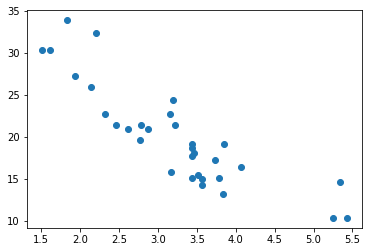

In [ ]:
# previously imported seaborn (see above)
# sns.scatter(x=mtcars['mpg'], y=mtcars['wt'])

import matplotlib.pyplot as plt # Low level plotting
y = mtcars.mpg
x = mtcars.wt
plt.scatter(x,y)
# plt.show() 

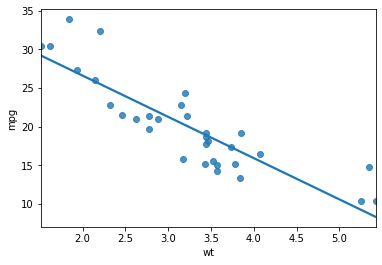

In [ ]:
sns.regplot(x="wt", y="mpg", data = mtcars, ci=None)

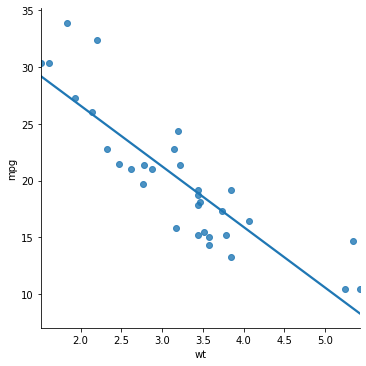

In [ ]:
sns.lmplot(x="wt", y="mpg", data=mtcars, ci=None)

In [ ]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(x, y)

In [ ]:
from statsmodels.formula.api import ols
model = ols("mpg ~ wt", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           1.29e-10
Time:                        19:04:02   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For plotting:

- Continuous vs continuous (i.e. scatter plot), but also
- Continuous vs categorical, or 
- Categorical vs continuous

**Y-Axis**
- Dependent variable (i.e. _dependent_ on the indpendent variable)
- Response (i.e. the _outcome_)
- f(x) (i.e. y _as a function of_ x)

**X-Axis**
- Independent variable (i.e. decided upon by the experimenter)
- Predictor (a variable that _predicts_ a specific resonse, i.e. y)

3. Convert `wt` column from pounds to kg (bouns points for adding it to the DataFrame).

In [ ]:
# Avoid making unnecessary new objects that are separate from your DataFrame
#twocol = mtcars[['mpg','wt']]
#twocol['kilo'] = y/2.2046
#twocol

In [ ]:
mtcars["wt"]

0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

In [ ]:
mtcars["wt"].apply(lambda x: x/2.2046) 

0     1.188424
1     1.304091
2     1.052345
3     1.458314
4     1.560374
5     1.569446
6     1.619341
7     1.446975
8     1.428831
9     1.560374
10    1.560374
11    1.846140
12    1.691917
13    1.714597
14    2.381384
15    2.460310
16    2.424476
17    0.997913
18    0.732559
19    0.832351
20    1.118117
21    1.596662
22    1.558106
23    1.741813
24    1.744081
25    0.877710
26    0.970698
27    0.686292
28    1.437903
29    1.256464
30    1.619341
31    1.261000
Name: wt, dtype: float64

In [ ]:
mtcars['wt_kg'] = mtcars['wt']/2.2046226218

In [ ]:
# Alternatvely:
# mtcars['wt_kg_2'] = mtcars['wt']*0.453592

# Indexing


In [ ]:
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [ ]:
foo_df['tissue']

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

In [ ]:
foo_df[['tissue']]

,tissue
0,Liver
1,Brain
2,Testes
3,Muscle
4,Intestine
5,Heart


In [ ]:
foo_df.tissue

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

index position as number with `.iloc[]`

In [ ]:
# First row, as a Series
foo_df.iloc[0] 

healthy      True
tissue      Liver
quantity       13
new             0
Name: 0, dtype: object

In [ ]:
# First row, as a DataFrame
foo_df.iloc[[0]] 

,healthy,tissue,quantity,new
0,True,Liver,13,0


In [ ]:
foo_df.iloc[[0, 1]] 

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0


Using two dimensions:

In [ ]:
# To get all columns, use : after the comma
foo_df.iloc[0,:] # : == everything 

healthy      True
tissue      Liver
quantity       13
new             0
Name: 0, dtype: object

In [ ]:
# Valid
# foo_df.iloc[0,]

Indexing begins at 0 and is _exclusive_

In [ ]:
# The first two columns, all rows
foo_df.iloc[:,:2] # 0, 1, and exclude 2

,healthy,tissue
0,True,Liver
1,False,Brain
2,False,Testes
3,True,Muscle
4,True,Intestine
5,False,Heart


In [ ]:
# One column as a Series
foo_df.iloc[:,1]

0        Liver
1        Brain
2       Testes
3       Muscle
4    Intestine
5        Heart
Name: tissue, dtype: object

In [ ]:
# The same, as a DataFrame
foo_df.iloc[:,1:2]

,tissue
0,Liver
1,Brain
2,Testes
3,Muscle
4,Intestine
5,Heart


In [ ]:
# counting from the opposite direction
# -1 is the last row
foo_df.iloc[-1,]
# forward: 0  1  2  3  4  5
# Reverse -6 -5 -4 -3 -2 -1

healthy     False
tissue      Heart
quantity       18
new             0
Name: 5, dtype: object

In [ ]:
foo_df

,healthy,tissue,quantity,new
0,True,Liver,13,0
1,False,Brain,88,0
2,False,Testes,1233,0
3,True,Muscle,55,0
4,True,Intestine,233,0
5,False,Heart,18,0


In [ ]:
foo_df.reverse()

AttributeError: ignored

**Exercise 5.1**

Using foo_df, retreive:

The 2nd to 3rd rows

In [ ]:
# foo_df.iloc[2:3, :] # only the 3rd row
# foo_df.iloc[[2,3],:] # the 3rd & the 4th row using a list
# foo_df.iloc[2:4] # the 3rd & the 4th row using : notation
# foo_df.iloc[0:2,]  # 1st & 2nd rows
# foo_df[-1:2,:] # Computer says "no"
# foo_df.iloc[3:,:] # 4th to the end 

# yes :)
foo_df.iloc[[1, 2]]  # 2nd & 3rd rows using a list
# foo_df.iloc[1:3,:] # 2nd & 3rd rows using : notation


The last 2 rows

In [ ]:
foo_df[-2:]

In [ ]:
# The last two no matter how long
foo_df.iloc[-2:]
# foo_df.iloc[[-1,-2],:] # specify the order with a list

In [ ]:
# Hard coding positions
# foo_df.iloc[ [4, 5],:]
# foo_df.iloc[4:,:] 

A random row in foo_df

In [ ]:
# import random
# foo_df.iloc[[random.randrange(0, len(foo_df))]]
foo_df.sample()

From the 4th to the last row
(But without hard-coding, i.e. regardless of how many rows my data frame contains)

In [ ]:
# foo_df[3:]
foo_df.iloc[3:,:]


** Exercise 5.2**

Using `.iloc()` with:



In [ ]:
# Integers? yes :)
foo_df.iloc[4,]


In [ ]:
# Floats? Computer says no
# foo_df[0.1:]

In [ ]:
# Strings (Characters)? Computer says "no"
# foo_df.iloc[:,'tissue']
# foo_df.iloc['Brain'] # need to look inside the tissue column
# foo_df.iloc['A'] # No is no 'A' anyways
# foo_df[heart:]   # No object defined 

In [ ]:
# A heterogenous list? Computer says "no"
# foo_df.iloc[:,[1, 'quantity']]



In [ ]:
# A homogenous list?
foo_df.iloc[[1,4,-1,-1,3,2,0]]


**Exercise 5.3**

Use indexing to obtain all the odd rows


In [ ]:
foo_df.iloc[1::2] # 2nd, 4th, 6th

In [ ]:
foo_df.iloc[lambda x: x.index % 2 == 1]

In [ ]:
foo_df[foo_df.index % 2 != 0]

Use indexing to obtain all the even rows

In [ ]:
foo_df.iloc[::2] # 1st, 3rd, 5th

In [ ]:
foo_df.iloc[lambda x: x.index % 2 == 0]

# Logical Expressions

Relational and logical operators

In [ ]:
foo_df[foo_df.quantity >= 233]

In [ ]:
foo_df[(foo_df.tissue == "Heart") | (foo_df.quantity >= 233)]

**Exercise 5.4**

Only “healthy” samples.


In [ ]:
foo_df[foo_df.healthy]


Only “unhealthy” samples.


In [ ]:
foo_df[-foo_df.healthy] 


In [ ]:
foo_df[~foo_df.healthy] 


**Exercise 5.5**


Only low quantity samples, those below 100.

Midrange: Quantity between 100 and 1000,


Tails of the distribution: Quantity below 100 and beyond 1000.


**Exercise 5.6**

Only “Heart” samples.

“Heart” and “liver” samples


Everything except “intestines”
